In [1]:
import numpy as np

In [2]:
import pandas as pd

In [37]:
df = pd.read_hdf('dataset/binance_data_train.h5', 'STW')
df.fillna(method='ffill', inplace=True)

In [38]:

df = df.iloc[1000:1500]
df.head()

,datetime,open_time,o,h,l,c,v,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
1000,2017-07-24 23:14:59.999,1500904800000,0.000042,0.000042,0.000042,0.000042,24870.0,1500905699999,1.052639,20,21129.0,0.894327,100048800.0
1001,2017-07-24 23:29:59.999,1500905700000,0.000042,0.000042,0.000042,0.000042,12813.0,1500906599999,0.542811,23,5129.0,0.217339,100048800.0
1002,2017-07-24 23:44:59.999,1500906600000,0.000042,0.000042,0.000042,0.000042,7685.0,1500907499999,0.325497,17,4282.0,0.181380,100048800.0
1003,2017-07-24 23:59:59.999,1500907500000,0.000042,0.000042,0.000042,0.000042,15649.0,1500908399999,0.662041,26,6847.0,0.289739,100045832.0
1004,2017-07-25 00:14:59.999,1500908400000,0.000042,0.000042,0.000042,0.000042,12806.0,1500909299999,0.541670,20,4357.0,0.184344,100045832.0


In [7]:
#stochastic
def fnStoch(m_Df, n=14): # price: 종가(시간 오름차순), n: 기간
    sz = len(m_Df['c'])
    if sz < n:
        # show error message
        raise SystemExit('입력값이 기간보다 작음')
    tempSto_K=[]
    for i in range( sz):
        if i >= n-1:
            tempUp =m_Df['c'][i] - min(m_Df['l'][i-n+1:i+1])
            tempDown = max(m_Df['h'][i-n+1:i+1]) -  min(m_Df['l'][i-n+1:i+1])
            tempSto_K.append( tempUp / tempDown )
        else:
            tempSto_K.append(0) #n보다 작은 초기값은 0 설정
    m_Df['Sto_K'] = pd.Series(tempSto_K,  index=m_Df.index)

    m_Df['Sto_D'] = pd.Series(m_Df['Sto_K'].rolling(3).mean())
    m_Df['Sto_SlD'] = pd.Series(m_Df['Sto_D'].rolling(3).mean())

    return m_Df

In [13]:
def fnMACD(m_Df, m_NumFast=12, m_NumSlow=26, m_NumSignal=9):
    m_Df['EMAFast'] = m_Df['c'].ewm( span = m_NumFast, min_periods = m_NumFast - 1).mean()
    m_Df['EMASlow'] = m_Df['c'].ewm( span = m_NumSlow, min_periods = m_NumSlow - 1).mean()
    m_Df['MACD'] = m_Df['EMAFast'] - m_Df['EMASlow']
    m_Df['MACDSignal'] = m_Df['MACD'].ewm( span = m_NumSignal, min_periods = m_NumSignal-1).mean()
    m_Df['MACDDiff'] = m_Df['MACD'] - m_Df['MACDSignal']
    return m_Df

In [39]:
fnMACD(df)
df

,datetime,open_time,o,h,l,c,v,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore,EMAFast,EMASlow,MACD,MACDSignal,MACDDiff
1000,2017-07-24 23:14:59.999,1500904800000,0.000042,0.000042,0.000042,0.000042,24870.0,1500905699999,1.052639,20,21129.0,0.894327,100048800.0,NaN,NaN,NaN,NaN,NaN
1001,2017-07-24 23:29:59.999,1500905700000,0.000042,0.000042,0.000042,0.000042,12813.0,1500906599999,0.542811,23,5129.0,0.217339,100048800.0,NaN,NaN,NaN,NaN,NaN
1002,2017-07-24 23:44:59.999,1500906600000,0.000042,0.000042,0.000042,0.000042,7685.0,1500907499999,0.325497,17,4282.0,0.181380,100048800.0,NaN,NaN,NaN,NaN,NaN
1003,2017-07-24 23:59:59.999,1500907500000,0.000042,0.000042,0.000042,0.000042,15649.0,1500908399999,0.662041,26,6847.0,0.289739,100045832.0,NaN,NaN,NaN,NaN,NaN
1004,2017-07-25 00:14:59.999,1500908400000,0.000042,0.000042,0.000042,0.000042,12806.0,1500909299999,0.541670,20,4357.0,0.184344,100045832.0,NaN,NaN,NaN,NaN,NaN
1005,2017-07-25 00:29:59.999,1500909300000,0.000042,0.000042,0.000042,0.000042,6127.0,1500910199999,0.259225,14,2773.0,0.117360,100045832.0,NaN,NaN,NaN,NaN,NaN
1006,2017-07-25 00:44:59.999,1500910200000,0.000042,0.000042,0.000042,0.000042,10609.0,1500911099999,0.448621,21,4217.0,0.178373,100045832.0,NaN,NaN,NaN,NaN,NaN
1007,2017-07-25 00:59:59.999,1500911100000,0.000042,0.000042,0.000042,0.000042,24712.0,1500911999999,1.044992,16,19003.0,0.803735,100045832.0,NaN,NaN,NaN,NaN,NaN
1008,2017-07-25 01:14:59.999,1500912000000,0.000042,0.000042,0.000042,0.000042,8940.0,1500912899999,0.377922,19,4550.0,0.192363,100045832.0,NaN,NaN,NaN,NaN,NaN
1009,2017-07-25 01:29:59.999,1500912900000,0.000042,0.000042,0.000042,0.000042,5693.0,1500913799999,0.240708,15,2402.0,0.101591,100048800.0,NaN,NaN,NaN,NaN,NaN


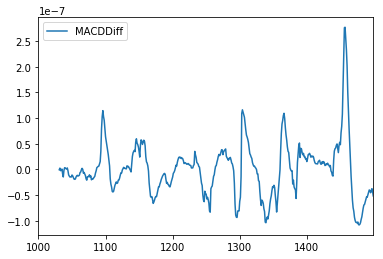

In [50]:
# df['MACD'].plot(label = 'MACD')
# df['MACDSignal'].plot(label = 'MACDSignal')
df['MACDDiff'].plot(label = 'MACDDiff')
plt.legend()

In [46]:
import matplotlib.pyplot as plt
plt.show()

In [41]:
df.describe()

,open_time,o,h,l,c,v,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore,EMAFast,EMASlow,MACD,MACDSignal,MACDDiff
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.0000,500.000000,500.000000,5.000000e+02,490.000000,476.000000,4.760000e+02,4.690000e+02,4.690000e+02
mean,1.501129e+12,0.000041,0.000041,0.000040,0.000041,25867.277344,1.501130e+12,1.039677,25.7060,14368.011719,0.578855,1.002598e+08,0.000040,0.000040,-3.322414e-08,-3.405968e-08,5.352386e-10
std,1.300336e+08,0.000002,0.000002,0.000002,0.000002,36478.992188,1.300336e+08,1.468069,10.3236,29844.773438,1.210514,1.054740e+05,0.000002,0.000002,1.914747e-07,1.832087e-07,5.354933e-08
min,1.500905e+12,0.000037,0.000037,0.000037,0.000037,3886.000000,1.500906e+12,0.161912,10.0000,1432.000000,0.059927,1.000458e+08,0.000037,0.000037,-4.926364e-07,-4.509905e-07,-1.082888e-07
25%,1.501017e+12,0.000040,0.000040,0.000040,0.000040,10336.750000,1.501018e+12,0.429667,19.0000,4781.250000,0.195285,1.002126e+08,0.000040,0.000040,-1.225182e-07,-1.266090e-07,-2.894393e-08
50%,1.501129e+12,0.000041,0.000041,0.000041,0.000041,15153.500000,1.501130e+12,0.611691,23.0000,7344.500000,0.291782,1.002502e+08,0.000041,0.000041,-3.910362e-08,-4.007897e-08,1.341573e-09
75%,1.501242e+12,0.000042,0.000042,0.000042,0.000042,23580.500000,1.501243e+12,0.920730,29.0000,10848.000000,0.432851,1.003390e+08,0.000042,0.000042,2.757652e-08,1.895207e-08,2.385465e-08
max,1.501354e+12,0.000042,0.000043,0.000042,0.000042,313568.000000,1.501355e+12,12.589324,89.0000,310984.000000,12.486853,1.004200e+08,0.000042,0.000042,7.529943e-07,6.526108e-07,2.768269e-07


In [51]:
def fnBolingerBand(m_DF, n=20, k=2):
    m_DF['20d_ma'] = m_DF['c'].rolling(n).mean()
    m_DF['Bol_upper'] = m_DF['c'].rolling(n).mean() + k* m_DF['c'].rolling(n).std()
    m_DF['Bol_lower'] = m_DF['c'].rolling(n).mean() - k* m_DF['c'].rolling(n).std()
    return m_DF

In [52]:
fnBolingerBand(df)
df.tail()

,datetime,open_time,o,h,l,c,v,close_time,qav,num_trades,...,taker_quote_vol,ignore,EMAFast,EMASlow,MACD,MACDSignal,MACDDiff,20d_ma,Bol_upper,Bol_lower
1495,2017-07-30 02:59:59.999,1501350300000,0.00004,0.00004,0.00004,0.00004,42478.0,1501351199999,1.697170,40,...,0.368129,100212640.0,0.00004,0.00004,4.687675e-08,9.245341e-08,-4.557666e-08,0.00004,0.00004,0.00004
1496,2017-07-30 03:14:59.999,1501351200000,0.00004,0.00004,0.00004,0.00004,12590.0,1501352099999,0.502913,18,...,0.366073,100212640.0,0.00004,0.00004,3.839988e-08,8.164271e-08,-4.324283e-08,0.00004,0.00004,0.00004
1497,2017-07-30 03:29:59.999,1501352100000,0.00004,0.00004,0.00004,0.00004,26149.0,1501352999999,1.043929,30,...,0.490101,100212640.0,0.00004,0.00004,3.451170e-08,7.221651e-08,-3.770481e-08,0.00004,0.00004,0.00004
1498,2017-07-30 03:44:59.999,1501353000000,0.00004,0.00004,0.00004,0.00004,27676.0,1501353899999,1.102893,23,...,0.152388,100212640.0,0.00004,0.00004,1.830871e-08,6.143495e-08,-4.312624e-08,0.00004,0.00004,0.00004
1499,2017-07-30 03:59:59.999,1501353900000,0.00004,0.00004,0.00004,0.00004,26184.0,1501354799999,1.042112,34,...,0.360710,100212640.0,0.00004,0.00004,-3.369643e-09,4.847403e-08,-5.184367e-08,0.00004,0.00004,0.00004
